In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=yf.download('AMZN',start='2015-01-01',end='2018-12-31',adjusted=True,progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200
2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200
2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000
2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300
2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400


In [7]:
amzn=df.resample('W')\
        .last()\
        .rename(columns={'Adj Close':'adj_close'})\
        .adj_close
amzn

Date
2015-01-04     308.519989
2015-01-11     296.929993
2015-01-18     290.739990
2015-01-25     312.390015
2015-02-01     354.529999
                 ...     
2018-12-02    1690.170044
2018-12-09    1629.130005
2018-12-16    1591.910034
2018-12-23    1377.449951
2018-12-30    1478.020020
Freq: W-SUN, Name: adj_close, Length: 209, dtype: float64

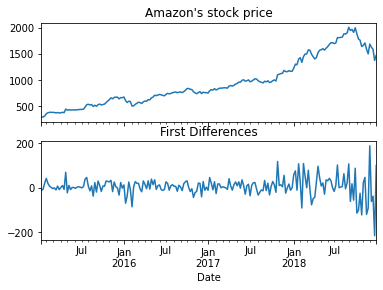

In [10]:
amzn_diff=amzn.diff().dropna()
fig,ax=plt.subplots(2,sharex=True)
amzn.plot(title="Amazon's stock price",ax=ax[0])
amzn_diff.plot(ax=ax[1],title='First Differences')

In [13]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
import warnings

# settings 
warnings.filterwarnings('ignore', '.*output shape of zoom.*')
warnings.simplefilter(action='ignore', category=InterpolationWarning)
plt.style.use('seaborn')

def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity
    
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary
    Parameters
    ----------
    x : pd.Series / np.array
        The time series to be checked for stationarity
    
    Returns
    -------
    results: pd.DataFrame
        A DataFrame with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)

    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results


def kpss_test(x, h0_type='c'):
    '''
    Function for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity
    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary
    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend
    
    Returns
    -------
    results: pd.DataFrame
        A DataFrame with the KPSS test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)

    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results


def test_autocorrelation(x, n_lags=40, alpha=0.05, h0_type='c'):
    '''
    Function for testing the stationarity of a series by using:
    * the ADF test
    * the KPSS test
    * ACF/PACF plots
    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    n_lags : int
        The number of lags for the ACF/PACF plots
    alpha : float
        Significance level for the ACF/PACF plots
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure containing the ACF/PACF plot
    '''

    adf_results = adf_test(x)
    kpss_results = kpss_test(x, h0_type=h0_type)

    print('ADF test statistic: {:.2f} (p-val: {:.2f})'.format(adf_results['Test Statistic'],
                                                             adf_results['p-value']))
    print('KPSS test statistic: {:.2f} (p-val: {:.2f})'.format(kpss_results['Test Statistic'],
                                                              kpss_results['p-value']))

    fig, ax = plt.subplots(2, figsize=(16, 8))
    plot_acf(x, ax=ax[0], lags=n_lags, alpha=alpha)
    plot_pacf(x, ax=ax[1], lags=n_lags, alpha=alpha)

    return fig

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


ADF test statistic: -15.49 (p-val: 0.00)
KPSS test statistic: 0.08 (p-val: 0.10)


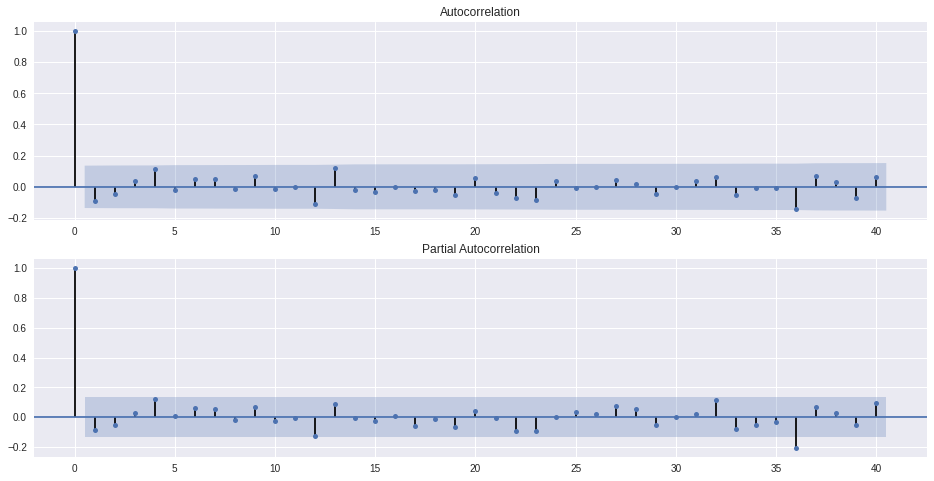

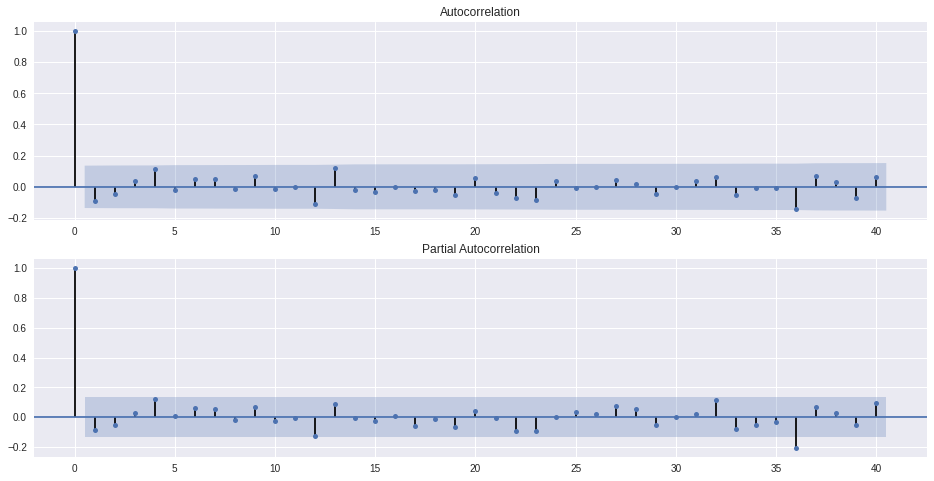

In [14]:
test_autocorrelation(amzn_diff)

In [16]:
arima=ARIMA(amzn,order=(2,1,1)).fit(disp=0)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.adj_close   No. Observations:                  208
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1071.580
Method:                       css-mle   S.D. of innovations             41.798
Date:                Tue, 16 Nov 2021   AIC                           2153.159
Time:                        11:06:49   BIC                           2169.847
Sample:                    01-11-2015   HQIC                          2159.907
                         - 12-30-2018                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6252      2.537      2.217      0.028       0.652      10.598
ar.L1.D.adj_close    -0.1922      0.539     -0.357      0.722      -1.249       0.864
ar.L2.D.adj_close    -0.0656      0.087     -0.755      0.451      -0.236       0.105
ma.L1.D.adj_close     0.1001      0.536      0.187      0.852      -0.950       1.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4657           -3.6195j            3.9050           -0.3112
AR.2           -1.4657           +3.6195j            3.9050            0.3112
MA.1           -9.9944           +0.0000j            9.9944            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
def arima_dianostics(resids,n_lags=40):
    fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
    r=resids
    resids=(r-np.nanmean(r))/np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]

    sns.lineplot(x=np.arange(len(resids)),y=resids,ax=ax1)
    ax1.set_title('Standardized residuals')

    x_lim = (-1.96*2,1.96*2)
    r_range=np.linspace(x_lim[0],x_lim[1])
    norm_pdf=scs.norm.pdf(r_range)
    sns.distplot(resids_nonmissing,hist=True,kde=True,norm_hist=True,ax=ax2)
    ax2.plot(r_range,norm_pdf,'g',lw=2,label='N(0,1)')
    ax2.set_title('Distribution of standardized residuals')

    ax2.set_xlim(x_lim)

    qq=sm.qqplot(resids_nonmissing,line='s',ax=ax3)
    ax3.set_title('Q-Q plot')

    plot_acf(resids,ax=ax4,lags=n_lags,alpha=0.5)
    ax4.set_title('ACF plot')


    return fig

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


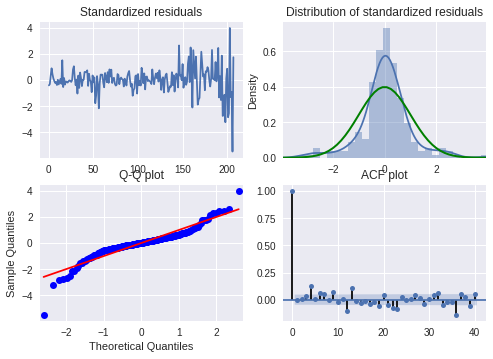

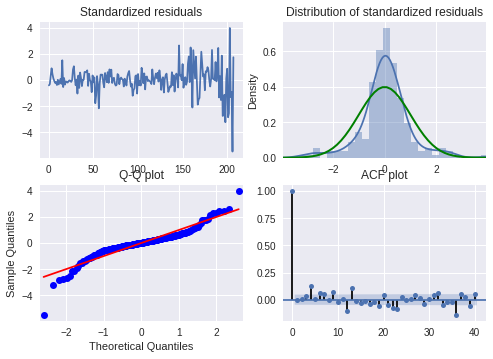

In [22]:
arima_dianostics(arima.resid,40)

[Text(0, 0.5, 'p-value'),
 Text(0.5, 0, 'Lag'),
 Text(0.5, 1.0, "Ljung-Box test's results")]

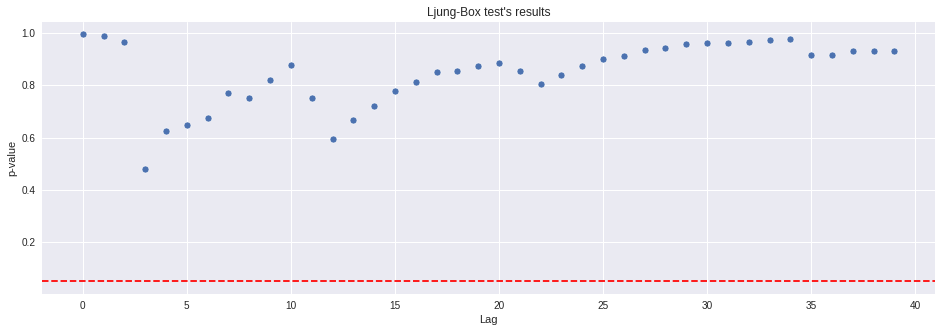

In [24]:
ljung_box_results=acorr_ljungbox(arima.resid)
fig,ax=plt.subplots(1,figsize=[16,5])
sns.scatterplot(x=range(len(ljung_box_results[1])),y=ljung_box_results[1],ax=ax)
ax.axhline(0.05,ls='--',c='r')
ax.set(title="Ljung-Box test's results",xlabel='Lag',ylabel='p-value')

In [27]:
!pip install pmdarima

In [28]:
import pmdarima as pm

In [31]:
model=pm.auto_arima(amzn,error_acion='ignore',suppress_warnings=True,seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1072.707
Date:                Tue, 16 Nov 2021   AIC                           2149.414
Time:                        12:00:02   BIC                           2156.089
Sample:                             0   HQIC                          2152.113
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6226      2.953      1.904      0.057      -0.165      11.410
sigma2      1766.2513     89.771     19.675      0.000    1590.303    1942.199
===================================================================================
Ljung-Box (Q):                       31.11   Jarque-Bera (JB):               282.98
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               7.30   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
model=pm.auto_arima(amzn,error_action='ignore',suppress_warnings=True,seasonal=False,stepwise=False,approximation=False,n_jobs=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1072.707
Date:                Tue, 16 Nov 2021   AIC                           2149.414
Time:                        12:01:55   BIC                           2156.089
Sample:                             0   HQIC                          2152.113
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.6226      2.953      1.904      0.057      -0.165      11.410
sigma2      1766.2513     89.771     19.675      0.000    1590.303    1942.199
===================================================================================
Ljung-Box (Q):                       31.11   Jarque-Bera (JB):               282.98
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               7.30   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
n_forecasts=len(amzn)
arima_pred=arima.forecast(n_forecasts)
arima_pred=[pd.DataFrame(arima_pred[0],columns=['prediction']),pd.DataFrame(arima_pred[2],columns=['ci_lower','ci_upper'])]
arima_pred=pd.concat(arima_pred,axis=1).set_index(amzn.index)

In [38]:
auto_arima_pred = model.predict(n_periods=n_forecasts, 
                                     return_conf_int=True, 
                                     alpha=0.05)

auto_arima_pred = [pd.DataFrame(auto_arima_pred[0], 
                                columns=['prediction']),
                   pd.DataFrame(auto_arima_pred[1], 
                                columns=['ci_lower', 'ci_upper'])]
auto_arima_pred = pd.concat(auto_arima_pred, 
                            axis=1).set_index(amzn.index)

In [41]:


plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')

COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

<Figure size 576x396 with 0 Axes>

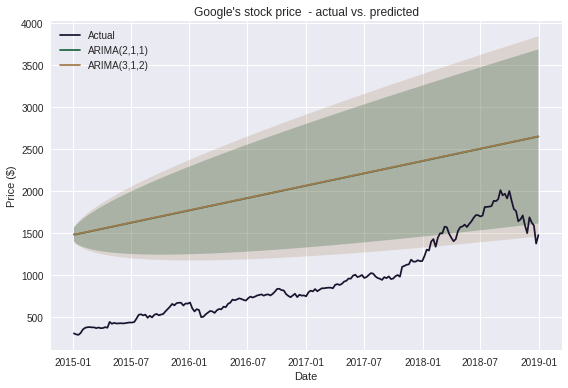

In [42]:
fig, ax = plt.subplots(1)

ax = sns.lineplot(data=amzn, color=COLORS[0], label='Actual')

ax.plot(arima_pred.prediction, c=COLORS[1], label='ARIMA(2,1,1)')
ax.fill_between(arima_pred.index,
                arima_pred.ci_lower,
                arima_pred.ci_upper,
                alpha=0.3, 
                facecolor=COLORS[1])

ax.plot(auto_arima_pred.prediction, c=COLORS[2], 
        label='ARIMA(3,1,2)')
ax.fill_between(auto_arima_pred.index,
                auto_arima_pred.ci_lower,
                auto_arima_pred.ci_upper,
                alpha=0.2, 
                facecolor=COLORS[2])

ax.set(title="Google's stock price  - actual vs. predicted", 
       xlabel='Date', 
       ylabel='Price ($)')
ax.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/ch3_im25.png')
plt.show()